In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable as stb

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest

from datetime import datetime, timedelta

from datetime import date
import holidays 

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

/home/cris/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/cris/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/cris/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("../data/bikes.csv", index_col = 0).reset_index(drop = True)
df.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


In [5]:
# Vemos las filas y columnas que tenemos:

df.shape

(730, 16)

In [6]:
# Visualizamos que no tenemos nulos:

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Comprobamos que no hay duplicados:

df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [9]:
lista_columnas = list(df.columns)
lista_columnas

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [10]:
#cambiamos el nombre de las columnas para que sea más comprensible.

dicc_columnas = {'instant' : 'momento',
                'dteday' : 'fecha',
                'season' : 'estacion',
                'yr' : 'año',
                'mnth' : 'mes',
                'holiday' : 'festivo',
                'weekday' : 'dia_semana',
                'workingday' : 'laboral',
                'weathersit' : 'clima',
                'temp' : 'temperatura',
                'atemp' : 'sensacion_termica',
                'hum' : 'humedad',
                'windspeed' : 'viento',
                'casual' : 'casual',
                'registered' : 'registrado',
                'cnt' : 'total'}

df.rename(columns = dicc_columnas, inplace = True)

In [11]:
columnas_unicos = ['estacion', 'año', 'mes', 'festivo', 'dia_semana', 'laboral', 'clima']

In [12]:
# Revisamos los valores únicos para las columnas seleccionadas.

for col in columnas_unicos:
    print(f'La columna {col} tiene como valores únicos: {", ".join(map(str, df[col].unique()))}.')

La columna estacion tiene como valores únicos: spring, summer, autumn, winter.
La columna año tiene como valores únicos: 0, 1.
La columna mes tiene como valores únicos: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.
La columna festivo tiene como valores únicos: 0, 1.
La columna dia_semana tiene como valores únicos: 6, 0, 1, 2, 3, 4, 5.
La columna laboral tiene como valores únicos: 0, 1.
La columna clima tiene como valores únicos: 2, 1, 3.


In [13]:
# Cambiamos el formato de esta columna a datetime:

df["fecha"] = df["fecha"].apply(pd.to_datetime)

In [14]:
# Modificamos la columna de años ya que únicamente había 0 y 1.

df["año"]= df["fecha"].apply(lambda x: x.strftime("%Y"))


In [15]:
df.sample(5)

,momento,fecha,estacion,año,mes,festivo,dia_semana,laboral,clima,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
444,445,2019-03-21,summer,2019,3,0,3,1,2,21.798347,25.66290,82.1250,6.000406,1122,5108,6230
82,83,2018-03-24,summer,2018,3,0,4,1,2,11.685000,13.54165,80.5833,16.333729,166,1699,1865
229,230,2018-08-18,autumn,2018,8,0,4,1,1,29.178347,33.11290,65.4583,15.624936,639,3166,3805
412,413,2019-02-17,spring,2019,2,0,5,1,1,14.076653,17.58145,63.4583,13.791682,349,3805,4154
508,509,2019-05-24,summer,2019,5,0,4,1,1,26.855000,30.33500,71.6667,11.584032,1059,5711,6770


In [16]:
# Nos hemos dado cuenta de que los meses de la columna "mes" no coinciden con los de "fecha". Por tanto, vamos a ajustarlos según el mes indicado fecha.

df["mes"] = df["fecha"].dt.strftime("%B")
df["mes"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [17]:
meses = {"January": "enero", "February" : "febrero", "March" : "marzo", "April" : "abril", "May" : "mayo", "June" : "junio", "July" : "julio",
       "August": "agosto", "September" : "septiembre", "October" : "octubre", "November" : "noviembre", "December" : "diciembre"}


df["mes"] = df["mes"].map(meses)

In [18]:
df["mes"].unique()

array(['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
       'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
      dtype=object)

In [19]:
# Nos hemos dado cuenta de que las estaciones están cambiadas, así que vamos a ponerlas bien.

def cambiar_estacion (fecha):

    """Recibe una columna en formato datetime, y en función del mes y el día devuelve la estación del año a la que pertenece"""
    
    mes = fecha.strftime("%B")
    dia = int(fecha.strftime("%d"))
    
    if mes == "April" or mes == "May":
        return "primavera"
    
    elif (mes == "March" and dia >= 20) or (mes == "June" and dia <= 20):
        return "primavera"
    
    if mes == "July" or  mes == "August":
        return "verano"
    
    elif (mes == "June" and dia >= 21) or (mes == "September" and dia <= 22):
        return "verano"
    
    if mes == "October" or mes == "November":
        return "otoño"
    
    elif (mes == "September" and dia >= 23) or (mes == "December" and dia <= 21):
        return "otoño"
    else:
        return "invierno"


In [20]:
df["estacion"] = df["fecha"].apply(cambiar_estacion)

In [21]:
df["estacion"].unique()

array(['invierno', 'primavera', 'verano', 'otoño'], dtype=object)

In [22]:
#También están mal los días de la semana, así que los cambiamos. 

df["dia_semana"] = df["fecha"].dt.strftime("%w")

In [23]:
def cambiar_dia(columna):

    """Recibe una columna tipo datetime y devuelve el día de la semana que corresponde."""
    
    dia = columna.strftime("%w")
    
    if dia == "0":
        return "domingo" 
    elif dia == "1":
        return "lunes"
    elif dia == "2":
        return "martes"
    elif dia == "3":
        return "miércoles"
    elif dia == "4":
        return "jueves"
    elif dia == "5":
        return "viernes"
    else:
        return "sábado"

In [24]:
df["dia_semana"] = df["fecha"].apply(cambiar_dia)

In [25]:
df.index

RangeIndex(start=0, stop=730, step=1)

In [26]:
def festivos_DC(col):

    """Devuelve los festivos de la ciudad de Washington DC.
    Args: fecha que queremos analizar sin es festiva o no
    Return: string con 'sí' o 'no' en función de si es festivo o no.
    """

    festivo = holidays.US(state = 'DC')

    if col in festivo:
        return 'sí'
    else:
        return 'no'

In [27]:
df['festivo'] = df['fecha'].apply(festivos_DC)

In [28]:
def laborales(col):

    """Devuelve los días laborales de la ciudad de Washington DC (en función de si son festivos o fin de semana, o días no festivos entre semana)
    Args: fecha que queremos analizar sin es laboral o no.
    Return: string con 'sí' o 'no' en función de si es laboral o no.
    """

    dia = col.strftime("%w")
    festivo = holidays.US(state = 'DC')
    
    if col in festivo:
        return "no"
    elif dia == "6" or dia == "0":
        return "no"
    else:
        return "sí"

In [29]:
df['laboral'] = df['fecha'].apply(laborales)

In [30]:
def cambiar_clima(dia):

    """Cambia la codificación de la columna clima de números a texto descriptivo
    Args: registro que queremos cambiar
    Return: registro modificado
    """
    
    if dia == 1:
        return "cielo despejado" 
    elif dia == 2:
        return "niebla"
    elif dia == 3:
        return "precipitaciones ligeras"
    else:
        return "precipitaciones abundantes"

In [31]:
df['clima'] = df['clima'].map(cambiar_clima)

In [32]:
lista_redondeo = ["temperatura", "sensacion_termica", "humedad", "viento"]

for col in lista_redondeo:
    df[col] = df[col].apply(lambda elemento: round(elemento, 1))

In [33]:
df.head()

,momento,fecha,estacion,año,mes,festivo,dia_semana,laboral,clima,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
0,1,2018-01-01,invierno,2018,enero,sí,lunes,no,niebla,14.1,18.2,80.6,10.7,331,654,985
1,2,2018-02-01,invierno,2018,febrero,no,jueves,sí,niebla,14.9,17.7,69.6,16.7,131,670,801
2,3,2018-03-01,invierno,2018,marzo,no,jueves,sí,cielo despejado,8.1,9.5,43.7,16.6,120,1229,1349
3,4,2018-04-01,primavera,2018,abril,no,domingo,no,cielo despejado,8.2,10.6,59.0,10.7,108,1454,1562
4,5,2018-05-01,primavera,2018,mayo,no,martes,sí,cielo despejado,9.3,11.5,43.7,12.5,82,1518,1600


In [34]:
#Hemos observado que la columna momento no nos aporta nada de información relevante para nuestro análisis, procedemos a eliminarla.

df.drop('momento', axis = 1, inplace = True)

## Gestión de outliers

In [35]:
numericas = df.select_dtypes(np.number)

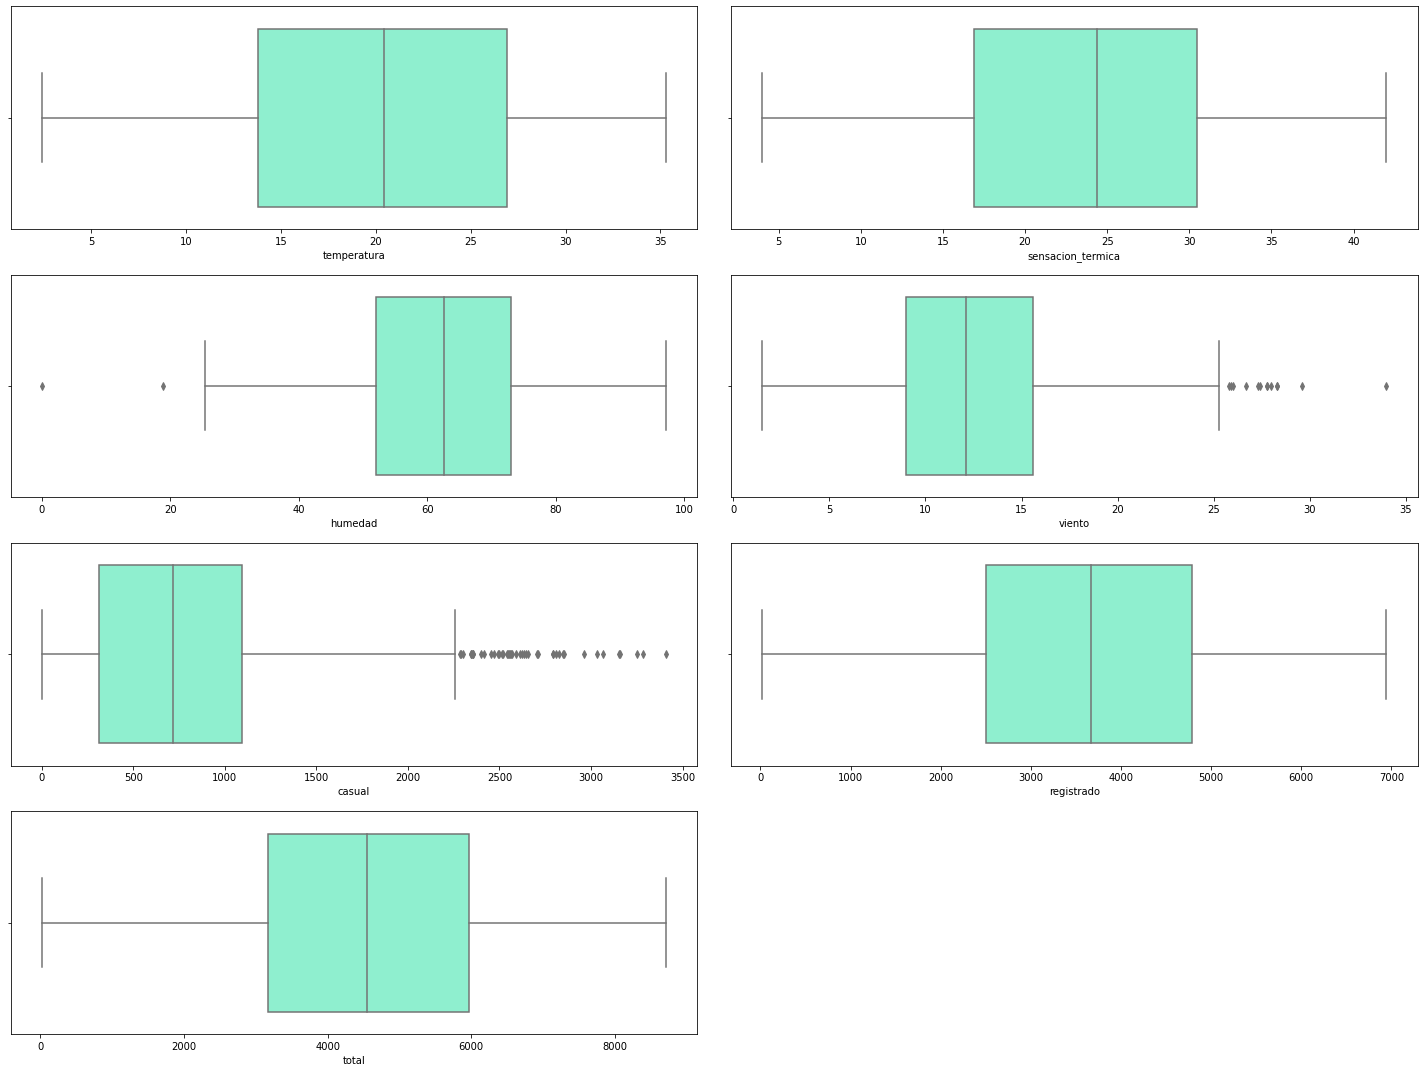

In [36]:
fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
        sns.boxplot(x = numericas[columna],
            data = df, ax=axes[indice], 
            color = "aquamarine"); 
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

Hemos visto que hay outliers en tres columnas, que son viento, casual y humedad. Sólo vamos a imputar los outliers de humedad, ya que hemos realizado una investigación y hemos visto que en la ciudad de Washington DC es imposible una humedad de 0%, y muy rara una humedad de menos de 20%, aunque sí es más factible. 

In [37]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    for col in lista_columnas:

        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)

        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR

        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index)) 
    
    return dicc_indices 

In [38]:
detectar_outliers(["humedad"], df)

{'humedad': [49, 68]}

In [39]:
df.loc[49].reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
index,fecha,estacion,año,mes,festivo,dia_semana,laboral,clima,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
49,2018-02-19 00:00:00,invierno,2018,febrero,sí,lunes,no,cielo despejado,16.4,19.6,18.8,34.0,532,1103,1635


In [40]:
df.loc[68].reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
index,fecha,estacion,año,mes,festivo,dia_semana,laboral,clima,temperatura,sensacion_termica,humedad,viento,casual,registrado,total
68,2018-10-03 00:00:00,otoño,2018,octubre,no,miércoles,sí,precipitaciones ligeras,16.0,19.3,0.0,17.5,46,577,623


In [41]:
df["humedad"].median()

62.650000000000006

In [42]:
df["humedad"].loc[68] = df["humedad"].median()

In [43]:
df["humedad"].loc[49] = df["humedad"].median()

Hemos imputado los outliers por la mediana de manera manual, porque solamente había dos datos. 

In [45]:
df.to_pickle("../data/bikes_limpio.pkl")
df.to_csv("../data/bikes_limpio.csv")